In [21]:
# Import the libraries
# System
import os
# Data-analysis
import pandas as pd   #importing all the important packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Pokemon Libraries
import requests
import matplotlib.pyplot as plt
from PIL import Image
import io

In [145]:
# Loading the data into a dataframe
dfm =  pd.read_csv('./Pokemon.csv')  #read the csv file and save it into a variable
dfm=dfm.rename(columns = {'#':"ID"}) # change the field name of the first column to ID
dfm.head(n=100)

,ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,88,Grimer,Poison,NaN,325,80,80,50,40,50,25,1,False
96,89,Muk,Poison,NaN,500,105,105,75,65,100,50,1,False
97,90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False


In [124]:
# Data Wrangling: Remove any column that may have NaN values and understand the data frame
df = dfm.copy()  # create a duplicate copy of the dataframe, which we will modify and work with in this script
try:
    df = df.dropna(axis=1)
except Exception:
    print("An error occurred:", 'Column was already deleted')
df.head()

,ID,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


**Q1: What are the different types of Pokémon, and how is each species distributed ?**
<br>
This question aims to identify the various types of Pokémon present in the dataset and understand the distribution of each species. By analyzing the dataset, we can determine the frequency and proportion of Pokémon belonging to different types or species. This information provides insights into the diversity and representation of Pokémon species in the dataset.

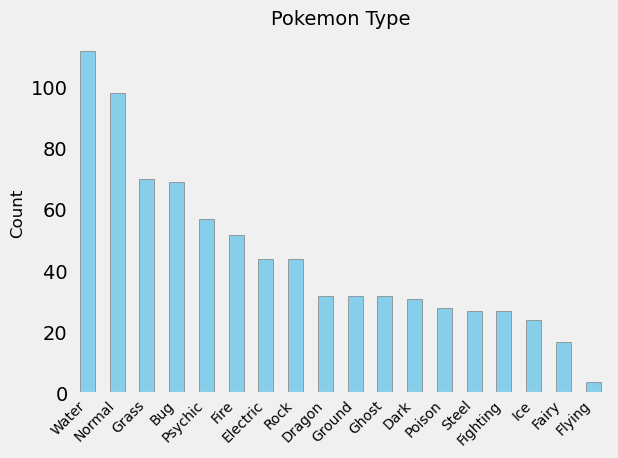

In [146]:
type1_counts = df['Type 1'].value_counts()  # Count the occurrences of each unique value in the 'Type 1' column

fig, ax = plt.subplots()
# Plot the histogram
type1_counts.plot.bar(color='skyblue', edgecolor='gray')
plt.xlabel('', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Pokemon Type', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
ax.grid(visible=False)
plt.show()

**Q2: What are some common types of pokemons and in percentage how many are they ?**
<br>
This question aims to identify the most common types of Pokémon present in the dataset. Based on the analysis, some common types of Pokémon observed in the dataset are water, fire, grass, and electric types. 

In [69]:
# Select four types of pokemons
water_pokemon = df[df['Type 1'].isin(['Water'])]
fire_pokemon = df[df['Type 1'].isin(['Fire'])]
grass_pokemon = df[df['Type 1'].isin(['Grass'])]
electric_pokemon = df[df['Type 1'].isin(['Electric'])]

/var/folders/x3/5z1dzlqx4j9g2g7gn96kpzjc0000gn/T/ipykernel_75611/135851065.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  percentages = np.array([water_pokemon_percent, fire_pokemon_percent, grass_pokemon_percent, electric_pokemon_percent,other_pokemen_percent]).flatten()


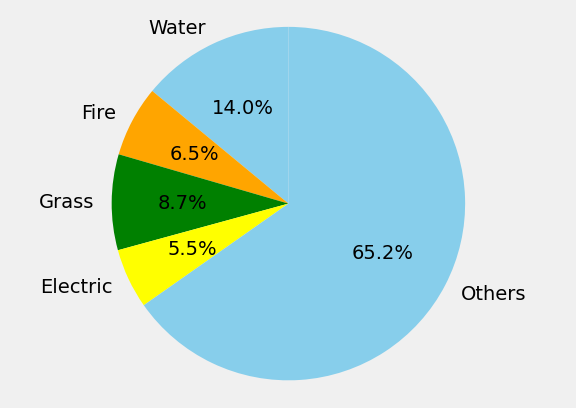

In [149]:
# Calculate the percentages for each type of Pokémon
water_pokemon_percent = water_pokemon['Type 1'].value_counts() / len(df)
fire_pokemon_percent = fire_pokemon['Type 1'].value_counts() / len(df)
grass_pokemon_percent = grass_pokemon['Type 1'].value_counts() / len(df)
electric_pokemon_percent = electric_pokemon['Type 1'].value_counts() / len(df)
other_pokemen_percent = 1 - np.sum([water_pokemon_percent,fire_pokemon_percent,grass_pokemon_percent,electric_pokemon_percent])

# Combine the percentages for all types
percentages = np.array([water_pokemon_percent, fire_pokemon_percent, grass_pokemon_percent, electric_pokemon_percent,other_pokemen_percent]).flatten()
labels = ['Water', 'Fire', 'Grass', 'Electric', 'Others']
colors = ['skyblue', 'orange', 'green', 'yellow']
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.show()


In [43]:
def fetch_all_pokemon_names():
    '''This function makes a get request to RESTful PokeApi to gather names of all available pokemons'''
    all_pokemon_names = []
    url = "https://pokeapi.co/api/v2/pokemon/"
    while url:
        response = requests.get(url)
        data = response.json()
        pokemon_names = [pokemon['name'] for pokemon in data['results']]
        all_pokemon_names.extend(pokemon_names)
        url = data['next']
    return all_pokemon_names

# Fetch all Pokémon names
pokemon_names = fetch_all_pokemon_names()

# Create a DataFrame
df2 = pd.DataFrame({'Pokemon Names': pokemon_names})

file_path = 'Pokemon_names.xlsx'

if not os.path.exists(file_path):
    df2.to_excel(file_path, index=False)
    print("DataFrame saved to Excel successfully.")
else:
    print("File already exists. DataFrame not saved.")


File already exists. DataFrame not saved.


In [33]:
def fetch_pokemon_image(starting_letters, ax):
    '''This function makes a get request to RESTful PokeApi to gather photographs of pokemons matching to a queried name'''
    url = "https://pokeapi.co/api/v2/pokemon/"
    while url:
        response = requests.get(url)
        data = response.json()
        for pokemon in data['results']:
            if pokemon['name'][:4] == starting_letters:
                pokemon_url = pokemon['url']
                pokemon_response = requests.get(pokemon_url)
                pokemon_data = pokemon_response.json()
                sprite_url = pokemon_data['sprites']['front_default']
                sprite_response = requests.get(sprite_url)
                image_data = io.BytesIO(sprite_response.content)
                image = Image.open(image_data)
                ax.imshow(image)
                ax.axis('off')
                return
        url = data['next']
    print(f"No Pokémon found with name starting with '{starting_letters}'")


**Q3: Who is the most powerful pokemon and who are others in top-5 ?**
<br>
This question aims to identify the most rare (and therefore powerful) types of Pokémon present in the dataset. 

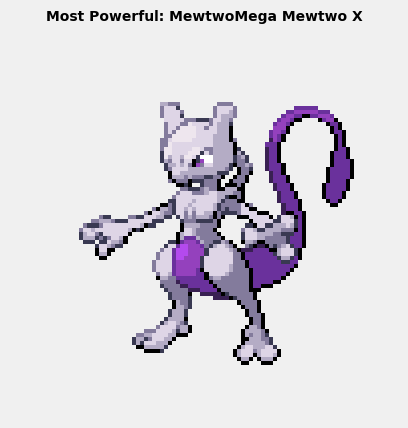

,ID,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,780,106,190,100,154,100,130,1,True


In [178]:
fig, axs = plt.subplots()
best_pokemon = df.loc[df['Total'].idxmax(), 'Name']
axs.set_title('Most Powerful: ' + best_pokemon, fontsize=10, fontweight = "bold")
fetch_pokemon_image(best_pokemon[:4].lower(), axs) 
plt.show() 
df[df['Legendary']==True].head(5)  #Showing the legendary pokemons

**Q3: Who is are most powerful Water, Fire, Grass and Electric Pokemons ?**
<br>
This question aims to identify the best pokemons in each category. 

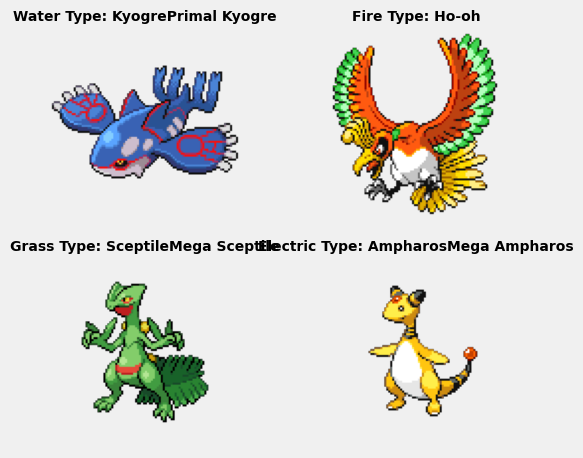

In [179]:
best_water_pokemon = water_pokemon.loc[water_pokemon['Total'].idxmax(), 'Name']
best_fire_pokemon = fire_pokemon.loc[fire_pokemon['Total'].idxmax(), 'Name']
best_grass_pokemon = grass_pokemon.loc[grass_pokemon['Total'].idxmax(), 'Name']
best_electric_pokemon = electric_pokemon.loc[electric_pokemon['Total'].idxmax(), 'Name']
fig, axs = plt.subplots(2, 2)

axs[0, 0].set_title('Water Type: ' + best_water_pokemon, fontsize=10, fontweight = "bold")
fetch_pokemon_image(best_water_pokemon[:4].lower(), axs[0, 0])  

axs[0, 1].set_title('Fire Type: ' + best_fire_pokemon, fontsize=10, fontweight = "bold")
fetch_pokemon_image( best_fire_pokemon[:4].lower(), axs[0, 1])  

axs[1, 0].set_title('Grass Type: ' + best_grass_pokemon, fontsize=10, fontweight = "bold")
fetch_pokemon_image(best_grass_pokemon[:4].lower(), axs[1, 0])  

axs[1, 1].set_title('Electric Type: ' +  best_electric_pokemon, fontsize=10, fontweight = "bold")
fetch_pokemon_image(best_electric_pokemon[:4].lower(), axs[1, 1])  

plt.tight_layout()
plt.show()

**Q4: Which are weakest Water, Fire, Grass and Electric Pokemons ?**
<br>
This question aims to identify the best pokemons in each category.

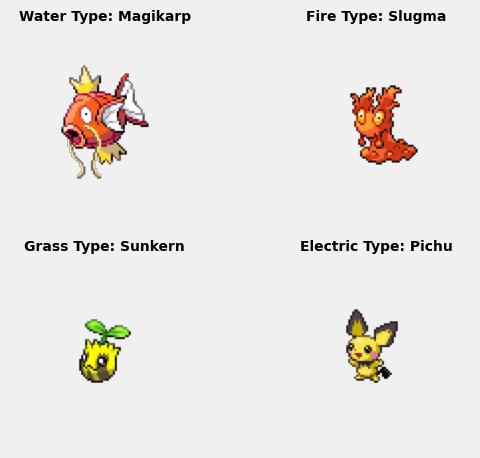

In [180]:
worst_water_pokemon = water_pokemon.loc[water_pokemon['Total'].idxmin(), 'Name']
worst_fire_pokemon = fire_pokemon.loc[fire_pokemon['Total'].idxmin(), 'Name']
worst_grass_pokemon = grass_pokemon.loc[grass_pokemon['Total'].idxmin(), 'Name']
worst_electric_pokemon = electric_pokemon.loc[electric_pokemon['Total'].idxmin(), 'Name']

fig, axs = plt.subplots(2, 2)
axs[0, 0].set_title('Water Type: ' + worst_water_pokemon, fontsize=10, fontweight = "bold")
fetch_pokemon_image(worst_water_pokemon[:4].lower(), axs[0, 0])  

axs[0, 1].set_title('Fire Type: ' + worst_fire_pokemon, fontsize=10, fontweight = "bold")
fetch_pokemon_image( worst_fire_pokemon[:4].lower(), axs[0, 1])  

axs[1, 0].set_title('Grass Type: ' + worst_grass_pokemon, fontsize=10, fontweight = "bold")
fetch_pokemon_image(worst_grass_pokemon[:4].lower(), axs[1, 0])  

axs[1, 1].set_title('Electric Type: ' +  worst_electric_pokemon, fontsize=10, fontweight = "bold")
fetch_pokemon_image(worst_electric_pokemon[:4].lower(), axs[1, 1])  
plt.tight_layout()
plt.show()

 **Q5: How are the various attributes related with each other ?**
 <br>
 This question aims to idenitfy if there are correlations between different fields in the dataset. 

Text(0.5, 1.0, 'Correlation Heatmap')

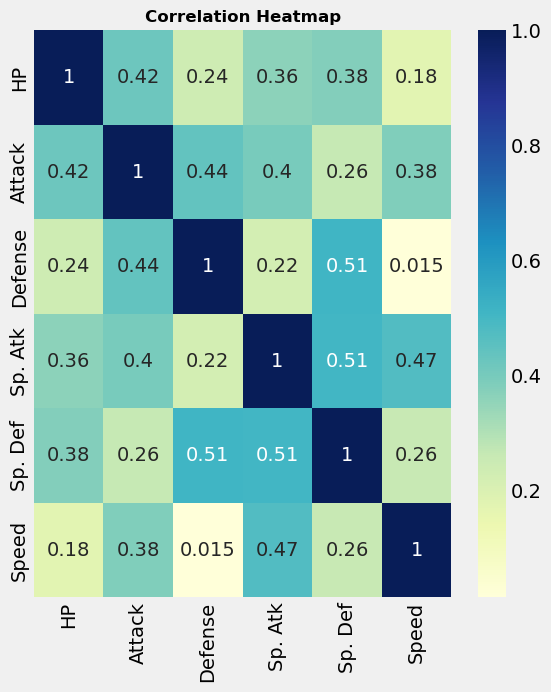

In [176]:
df_subset = df.iloc[:, 4:-2]
corr_matrix = df_subset.corr() # Compute the correlation matrix
plt.figure(figsize=(6, 7))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap", fontsize = 12, fontweight = "bold")

 **Q6: How do different pokemon types compare on defense and attack ?**
 <br>
 This question aims to visualize the attack and defense prowess of vaious pokemon types. 

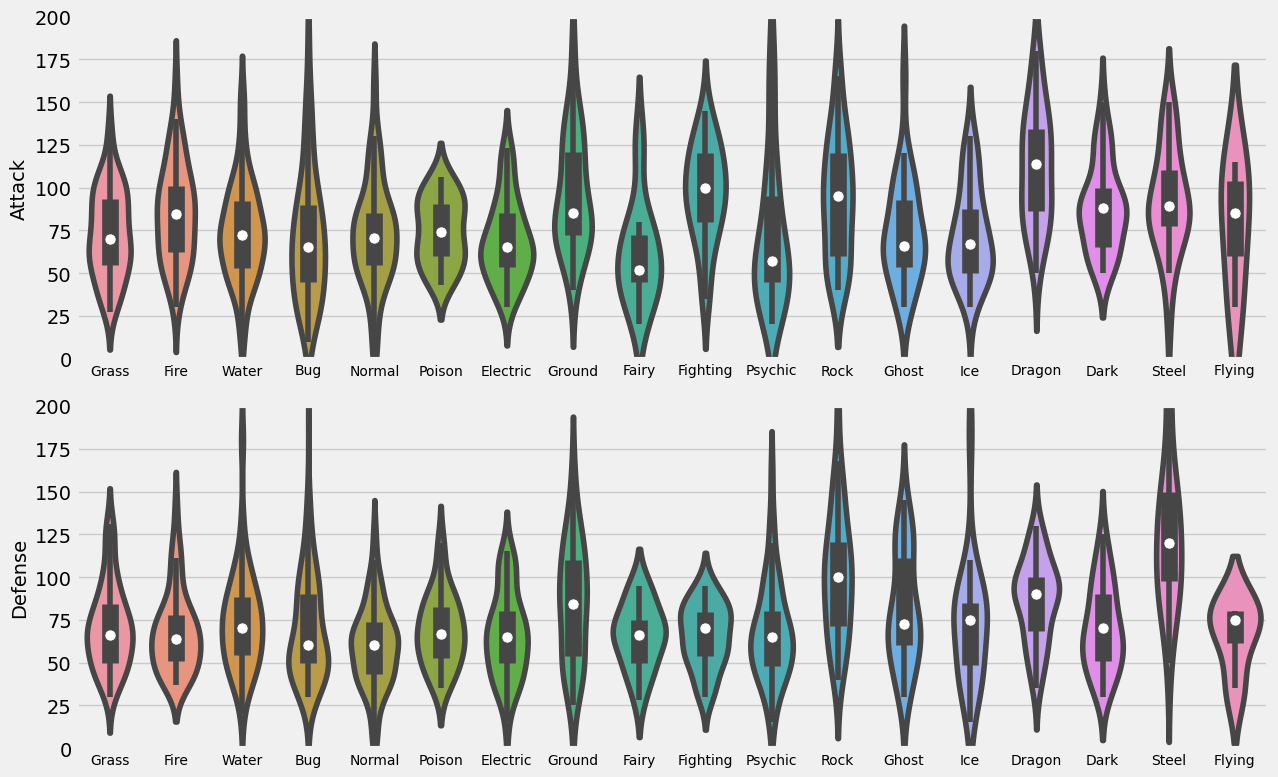

In [171]:
fig, axs = plt.subplots(2, 1, figsize=(13, 8))
sns.violinplot(x="Type 1", y="Attack", data=df, ax=axs[0])
axs[0].set_ylim(0, 200)
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=10) 
axs[0].set_xlabel("")

sns.violinplot(x="Type 1", y="Defense", data=df, ax=axs[1])
axs[1].set_ylim(0, 200)
axs[1].set_xticklabels(axs[0].get_xticklabels(), fontsize=10) 
axs[1].set_xlabel("")
plt.tight_layout()
plt.show()

 **Q6: How do special skills compare to the base type ?**
 <br>
 This question aims to visualize the special attack and special defense prowess of attack and defense type pokemons, respectively. 

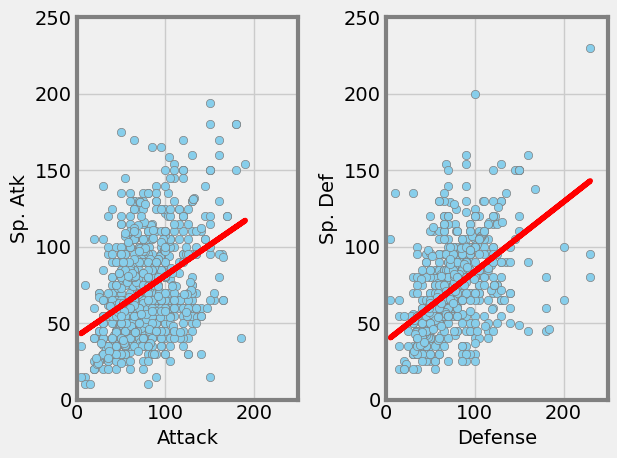

In [174]:

fig, axs = plt.subplots(1, 2)
axs[0].scatter(df['Attack'], df['Sp. Atk'],color='skyblue', edgecolor='gray')
axs[0].set_xlabel('Attack')
axs[0].set_ylabel('Sp. Atk')
# Fit a linear regression line
slope, intercept = np.polyfit(df['Attack'], df['Sp. Atk'], 1)
line = slope * df['Attack'] + intercept
axs[0].plot(df['Attack'], line, color='red', label='Linear Fit')
axs[0].set_xlim(0, 250)
axs[0].set_ylim(0, 250)
axs[0].spines['bottom'].set_color('0.5')
axs[0].spines['top'].set_color('0.5')
axs[0].spines['right'].set_color('0.5')
axs[0].spines['left'].set_color('0.5')

axs[1].scatter(df['Defense'], df['Sp. Def'],color='skyblue', edgecolor='gray')
axs[1].set_xlabel('Defense')
axs[1].set_ylabel('Sp. Def')
# Fit a linear regression line
slope, intercept = np.polyfit(df['Defense'], df['Sp. Def'], 1)
line = slope * df['Defense'] + intercept
axs[1].plot(df['Defense'], line, color='red', label='Linear Fit')
axs[1].set_xlim(0, 250)
axs[1].set_ylim(0, 250)
axs[1].spines['bottom'].set_color('0.5')
axs[1].spines['top'].set_color('0.5')
axs[1].spines['right'].set_color('0.5')
axs[1].spines['left'].set_color('0.5')
plt.tight_layout()
plt.show()
